<a href="https://colab.research.google.com/github/daurensd/ml-zoomcamp/blob/main/03_classification_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df = df[[
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP'
]]
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.rename(columns={'msrp':'price'}, inplace=True)

In [ ]:
# Question_1
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

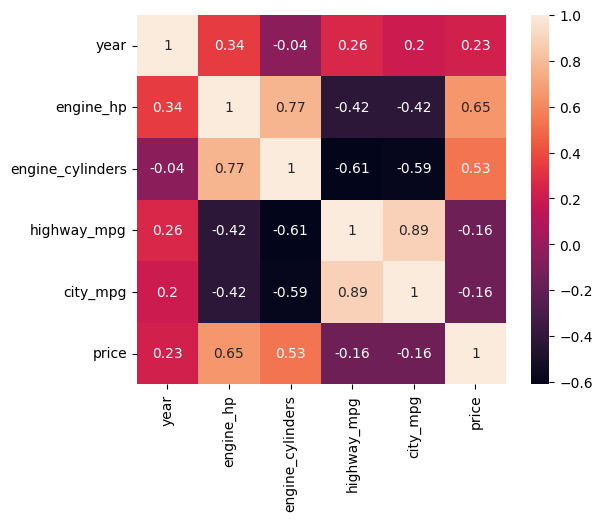

In [ ]:
# Question_2
import seaborn as sns
sns.heatmap(
    data=df.corr(numeric_only=True).round(2),
    square=True,
    annot=True,
);

In [ ]:
df['above_average'] = (df.price > df.price.mean()).astype(int)
del df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [ ]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values

In [ ]:
del df_train['above_average']
del df_val['above_average']

In [ ]:
df_train_full.dtypes[df_train_full.dtypes == 'object']

make                 object
model                object
transmission_type    object
vehicle_style        object
dtype: object

In [ ]:
df_train_full.dtypes[df_train_full.dtypes != 'object']

year                  int64
engine_hp           float64
engine_cylinders    float64
highway_mpg           int64
city_mpg              int64
above_average         int64
dtype: object

In [ ]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [ ]:
# Question_3
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return round(mutual_info_score(series, df_train_full.above_average), 2)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi)

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [ ]:
# Question_4
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

above_average = y_pred > 0.5

original_accuracy = round((y_val == above_average).mean(), 2)
original_accuracy

0.93

In [ ]:
# Question_5
from sklearn.feature_extraction import DictVectorizer
features = ['make', 'model', 'transmission_type', 'vehicle_style', 'year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
diff = []
for feature in features:
  print(feature)
  train_dict = df_train[features].drop(feature, axis=1).to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)

  X_train = dv.transform(train_dict)

  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
  model.fit(X_train, y_train)

  val_dict = df_val[features].drop(feature, axis=1).to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = model.predict_proba(X_val)[:, 1]

  above_average = y_pred > 0.5

  print(original_accuracy - (y_val == above_average).mean())
  diff.append(original_accuracy - (y_val == above_average).mean())
print('min:', min(diff))

make
-0.018804028535459483
model
0.013508182962652215
transmission_type
-0.015027276542173729
vehicle_style
-0.002018464120856045
year
-0.01838438942509435
engine_hp
-0.004955937893411644
engine_cylinders
-0.01712547209399906
highway_mpg
-0.01670583298363404
city_mpg
-0.015866554762903884
min: -0.018804028535459483


In [ ]:
# Question_6
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

df = df[[
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP'
]]

df.columns = df.columns.str.replace(' ', '_').str.lower()

df = df.fillna(0)

df.rename(columns={'msrp':'price'}, inplace=True)

df.price = np.log(df.price)

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = df_train.price.values
y_val = df_val.price.values

del df_train['price']
del df_val['price']

categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [ ]:
for alpha in [0, 0.01, 0.1, 1, 10]:
  print(alpha)
  train_dict = df_train[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)

  X_train = dv.transform(train_dict)

  from sklearn.linear_model import Ridge
  from sklearn.metrics import mean_squared_error

  model = Ridge(solver='sag', random_state=42, alpha=alpha)
  model.fit(X_train, y_train)

  val_dict = df_val[categorical + numerical].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = model.predict(X_val)
  print(y_pred)
  # round(np.sqrt(mean_squared_error(y_val, y_pred)), 3)

  # above_average = y_pred > 0.5

  # original_accuracy = round((y_val == above_average).mean(), 2)
  # original_accuracy

0
